In [8]:
import numpy as np
import scipy.io as spio
from math import comb
import plotly.express as px
import matplotlib.pyplot as plt
# pip install -U kaleido
import plotly.io as pio
pio.renderers.default = "notebook"

In [9]:
gait = spio.loadmat('/home/dhruv/Documents/Digit-py/octave/Digit-data_421762.mat')
# https://pyhogs.github.io/reading-mat-files.html
# https://stackoverflow.com/questions/3229419/how-to-pretty-print-nested-dictionaries
# from pprinit import pprint; pprint(gait)
pos = gait['data']['pos'][0,0]
vel = gait['data']['vel'][0,0]
acc = gait['data']['acc'][0,0]
phase = gait['data']['t'][0,0]
rowsddd, ncp = phase.shape
t_step = gait['data']['final_time'][0,0]
actR = np.loadtxt(open("/home/dhruv/Documents/Digit-py/octave/Ralpha.csv", "rb"), delimiter=",")
alpha = gait['data']['a'][0,0]
# a = [alpha(1:2,:); -alpha(3,:); alpha(4:6,:); alpha(11:12,:); -alpha(13,:); alpha(14:16,:); alpha(7,:); -alpha(8,:); alpha(9:10,:); alpha(17,:); -alpha(18,:); alpha(19:20,:)];
alpha = np.block([ [ alpha[0,:]],
                [ alpha[1,:]],
                [-alpha[2,:]],
                [ alpha[3,:]],
                [ alpha[4,:]],
                [ alpha[5,:]],
                [ alpha[10,:]],
                [ alpha[11,:]],
                [-alpha[12,:]],
                [ alpha[13,:]],
                [ alpha[14,:]],
                [ alpha[15,:]],
                [ alpha[6,:]],
                [-alpha[7,:]],
                [ alpha[8,:]],
                [ alpha[9,:]],
                [ alpha[16,:]],
                [-alpha[17,:]],
                [ alpha[18,:]],
                [ alpha[19,:]]
                ])
# Ralpha = actR@alpha
# diff = aa - Ralpha
# print(diff)

In [10]:
def BezierEval(alpha, s, t_step):
    rows, columns = alpha.shape
    M = columns-1
    q_des, dq_des, ddq_des = np.zeros(rows), np.zeros(rows), np.zeros(rows)
    for i in range(rows):
        for k in range(columns):
            q_des[i] = q_des[i] + alpha[i][k] * comb(M, k) * np.power(s, k) * np.power(1-s, M-k)
        for k in range(columns-1):
            # https://pomax.github.io/bezierinfo/#derivatives
            dq_des[i] = dq_des[i] + ((alpha[i][k+1] - alpha[i][k]) * 5 * comb(M-1, k) * np.power(s, k) * np.power(1-s, M-k-1))/t_step
        for k in range(columns-2):
            ddq_des[i] = ddq_des[i] + (((alpha[i][k+2] - alpha[i][k+1]) - (alpha[i][k+1] - alpha[i][k])) * 5 * 4 * comb(M-2, k) * np.power(s, k) * np.power(1-s, M-k-2))/(t_step**2)
    return q_des, dq_des, ddq_des 

In [11]:
rows, columns = alpha.shape
q_des, dq_des, ddq_des = np.zeros((rows,ncp)), np.zeros((rows,ncp)), np.zeros((rows,ncp))
time = np.linspace(0, 1, ncp)
for t in range(0, ncp):
    q_des[:,t], dq_des[:,t], ddq_des[:,t] = BezierEval(alpha, time[t], t_step)

<ipython-input-12-0045ced11960>:5: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



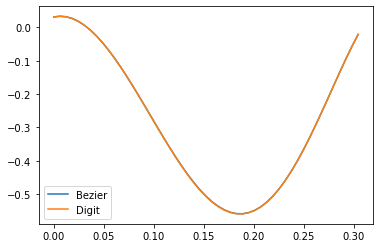

In [12]:
fig, ax = plt.subplots()
ax.plot(phase[0,:], q_des[3,:])
ax.plot(phase[0,:], pos[9,:])
# fig = px.line(x=phase[0,:], y=[vel[9,:],dq_des[3,:]], markers=[True, False], labels={'x':'Time', 'y':'Position'})
fig.show()
plt.legend(['Bezier', 'Digit'])

<ipython-input-13-9aa00862edd7>:5: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



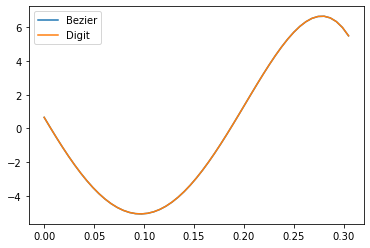

In [13]:
fig, ax = plt.subplots()
ax.plot(phase[0,:], dq_des[3,:])
ax.plot(phase[0,:], vel[9,:])
# fig = px.line(x=phase[0,:], y=[vel[9,:],dq_des[3,:]], markers=[True, False], labels={'x':'Time', 'y':'Position'})
fig.show()
plt.legend(['Bezier', 'Digit'])

<ipython-input-14-d88d7c1a2dcd>:5: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



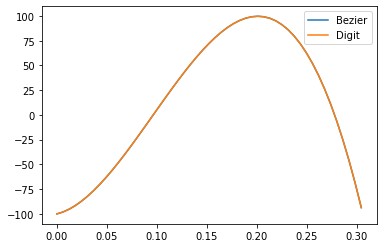

In [14]:
fig, ax = plt.subplots()
ax.plot(phase[0,:], ddq_des[3,:])
ax.plot(phase[0,:], acc[9,:])
# fig = px.line(x=phase[0,:], y=[vel[9,:],dq_des[3,:]], markers=[True, False], labels={'x':'Time', 'y':'Position'})
fig.show()
plt.legend(['Bezier', 'Digit'])

In [15]:
# fig.write_image("fig1.eps")

In [16]:
q_des1, dq_des, ddq_des = BezierEval(alpha, 0.000000, t_step)
print(q_des1)

q_des2, dq_des2, ddq_des2 = BezierEval(alpha, 0.000500, t_step)
print(q_des2)

[ 0.38060139 -0.09732928  0.50808404  0.03125875 -0.28071273  0.26292932
 -0.329031    0.06118999 -0.07466205  0.02112075 -0.14098178  0.14119567
  0.02952875  1.29367689  0.07099161  0.11691481 -0.60645726 -1.79836005
  0.805482    0.01257736]
[ 0.38035901 -0.09736532  0.50827635  0.03135736 -0.28096547  0.26309824
 -0.32923214  0.0611751  -0.07482356  0.02112536 -0.14080796  0.14097505
  0.02810599  1.29342114  0.07170872  0.11711351 -0.60756941 -1.79839703
  0.80594509  0.01252024]
